<a href="https://colab.research.google.com/github/ninjab3381/CNN_Robotic_Inference/blob/master/cnn_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import keras

TensorFlow 2.x selected.


Using TensorFlow backend.


In [2]:
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.5


In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 60

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.1)

train_generator = datagen.flow_from_directory(
    'drive/My Drive/Synopsys/pics/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    'drive/My Drive/Synopsys/pics/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 396 images belonging to 11 classes.
Found 44 images belonging to 11 classes.


In [4]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((60, 224, 224, 3), (60, 11))

In [5]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

from tensorflow.keras.applications import(
    vgg16, 
    inception_v3, 
    resnet50,
    mobilenet, 
    MobileNetV2
)
import numpy as np

# Create the base model from the pre-trained model MobileNet V2
base_model = resnet50.ResNet50(input_shape=IMG_SHAPE,
                   include_top=False, 
                   weights='imagenet')

94773248/94765736 [==============================] - 3s 0us/step


In [0]:
base_model.trainable = False

In [0]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

model = Sequential([
  base_model,
])
model.add(Conv2D(32, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())
model.add(Dense(11, activation='softmax'))

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          589856    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 11)                363       
Total params: 24,177,931
Trainable params: 590,219
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [11]:
epochs = 300

history = model.fit_generator(train_generator, 
                    epochs=epochs, 
                    validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 1 steps
Epoch 1/200
7/7 [==============================] - 215s 31s/step - loss: 4.9076 - accuracy: 0.2222 - val_loss: 2.5964 - val_accuracy: 0.0909
Epoch 2/200
7/7 [==============================] - 10s 1s/step - loss: 1.0107 - accuracy: 0.6414 - val_loss: 2.7305 - val_accuracy: 0.0909
Epoch 3/200
7/7 [==============================] - 10s 1s/step - loss: 0.4449 - accuracy: 0.8409 - val_loss: 2.5413 - val_accuracy: 0.0909
Epoch 4/200
7/7 [==============================] - 10s 1s/step - loss: 0.2010 - accuracy: 0.9268 - val_loss: 2.8467 - val_accuracy: 0.0909
Epoch 5/200
7/7 [==============================] - 10s 1s/step - loss: 0.0874 - accuracy: 0.9848 - val_loss: 3.1079 - val_accuracy: 0.0909
Epoch 6/200
7/7 [==============================] - 10s 1s/step - loss: 0.0324 - accuracy: 0.9975 - val_loss: 3.5653 - val_accuracy: 0.090

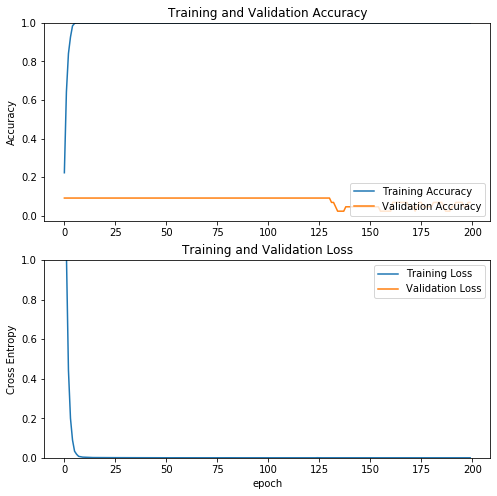

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
base_model.trainable = True

In [14]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  175


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          589856    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 11)                363       
Total params: 24,177,931
Trainable params: 20,043,147
Non-trainable params: 4,134,784
_________________________________________________________________


In [17]:
history_fine = model.fit_generator(train_generator, 
                                   epochs=300,
                                   validation_data=val_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 1 steps
Epoch 1/200
7/7 [==============================] - 15s 2s/step - loss: 2.2273e-05 - accuracy: 1.0000 - val_loss: 5.1044 - val_accuracy: 0.0909
Epoch 2/200
7/7 [==============================] - 10s 1s/step - loss: 1.2264e-05 - accuracy: 1.0000 - val_loss: 4.7745 - val_accuracy: 0.0909
Epoch 3/200
7/7 [==============================] - 10s 1s/step - loss: 5.9814e-06 - accuracy: 1.0000 - val_loss: 4.4886 - val_accuracy: 0.0909
Epoch 4/200
7/7 [==============================] - 10s 1s/step - loss: 5.3490e-06 - accuracy: 1.0000 - val_loss: 4.2431 - val_accuracy: 0.0909
Epoch 5/200
7/7 [==============================] - 10s 1s/step - loss: 5.2994e-06 - accuracy: 1.0000 - val_loss: 3.9723 - val_accuracy: 0.0909
Epoch 6/200
7/7 [==============================] - 10s 1s/step - loss: 1.7433e-05 - accuracy: 1.0000 - val_loss: 3.7485 - val_accuracy: 0.0909
Epoch 7/200
7/7 [==============================] - 1

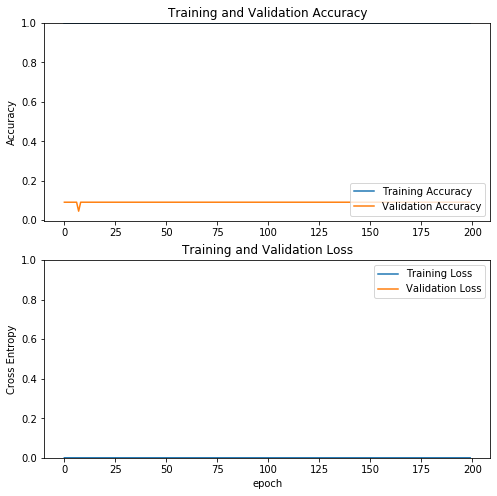

In [18]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [19]:
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
import numpy as np
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

17227776/17225924 [==============================] - 1s 0us/step


In [20]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

import urllib.request
import cv2
import numpy as np

# image loader
def get_image(loc, resize=400):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  img = cv2.imread(loc)
  # img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (400, 400), interpolation=cv2.INTER_CUBIC)


  # cropped = img[50:274, 50:274] - spoon
  cropped = img[100:324, 100:324]

  return cropped

     |████████████████████████████████| 28.2MB 54.0MB/s 
ERROR: tensor2tensor 1.14.1 has requirement tensorflow-probability==0.7.0, but you'll have tensorflow-probability 0.9.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
loc = 'drive/My Drive/Synopsys/pics/alfoil/alfoil_10.png'
loc = 'drive/My Drive/Synopsys/pics/milkcan/milkcan_10.png'
# loc = 'drive/My Drive/Synopsys/pics/spoon/spoon_20.png'
loc = 'drive/My Drive/Synopsys/pics/glassbottle/glassbottle_10.png'
# loc = 'drive/My Drive/Synopsys/pics/cokecan/cokecan_30.png'

PIL image size 150528


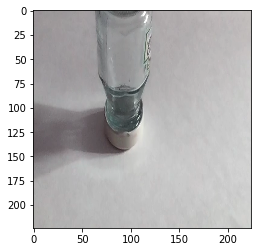

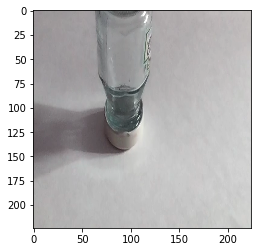

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


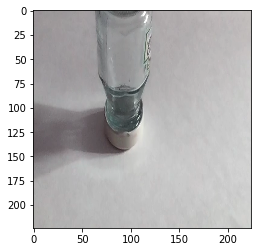

In [22]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
original = get_image(loc, 224)
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)a
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

0 7.59315e-11
1 1.7374528e-14
2 5.6293593e-06
3 0.00097562646
4 0.99894387
5 2.5648526e-06
6 9.288756e-09
7 7.078588e-05
8 3.313507e-12
9 1.4033793e-06
10 1.314595e-12


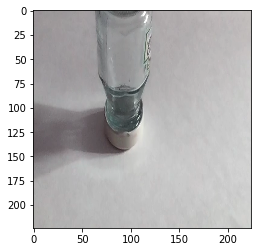

In [23]:
# prepare the image for the inception_v3 model
processed_image = resnet50.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
i = 1
for i, prediction in enumerate(predictions[0]):
  print(i, prediction)

In [24]:
lst = list(zip(predictions[0], list(train_generator.class_indices)))
print(lst)

[(7.59315e-11, 'alfoil'), (1.7374528e-14, 'box'), (5.6293593e-06, 'cbcontainer'), (0.00097562646, 'cokecan'), (0.99894387, 'glassbottle'), (2.5648526e-06, 'm_and_m'), (9.288756e-09, 'milkcan'), (7.078588e-05, 'plasticbottle'), (3.313507e-12, 'spoon'), (1.4033793e-06, 'steelspoon'), (1.314595e-12, 'straw')]


In [25]:
from operator import itemgetter
print(max(lst, key = itemgetter(0))) 

(0.99894387, 'glassbottle')


In [26]:
path = F"/content/drive/My Drive/Models/Resnet50/ninja_cnn_resnet50"
model.save(path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Models/Resnet50/ninja_cnn_resnet50/assets


In [0]:
model.input_shape